#  International AI Olympiad (IOAI) preparation - practice for Madagascar's  Team  🇲🇬
**Projet : Détection de type de machine (Ruby ou Sapphire)**\
Concours : IOAI - Olympiade Internationale d’Intelligence Artificielle

Objectif :
  - Utiliser des capteurs temporels pour classifier des objets (séquences temporelles).
  - Appliquer différentes méthodes de feature engineering (mean, std, downsampling).
  - Comparer les performances de plusieurs modèles de Decision Tree.
  - Générer des prédictions exportables.

Compétences :


* ✅ Prétraitement de données temporelles
*  ✅ Feature engineering simple
*  ✅ Arbre de décision
*  ✅ Évaluation par AUC, matrice de confusion, courbe ROC



Auteur : M'Crai Laydam | 🇲🇬 Madagascar

In [1]:
import numpy as np
import pandas as pd
import random

np.random.seed(2024)


In [2]:
def generate_signal(label, length=100, channels=8):
    """
    Génère un signal de capteur en fonction de la classe.
    - Ruby (1) : signaux avec fréquence plus élevée et plus de bruit
    - Sapphire (0) : plus lisses, moins bruités
    """
    base = np.linspace(0, 4*np.pi, length)
    signal = []
    for _ in range(channels):
        freq = 3 if label == 1 else 1
        noise = np.random.normal(0, 0.3 if label == 1 else 0.1, length)
        sig = np.sin(freq * base) + noise
        signal.append(sig)
    return np.stack(signal, axis=1)  # Shape (length, channels)


In [3]:

def generate_dataset(n_samples=100):
    dataset = {}
    for i in range(n_samples):
        label = random.choice([0, 1])
        signal = generate_signal(label)
        dataset[f"id_{i}"] = (signal, label)
    return dataset

In [4]:
# Create data
data = {
    "train": generate_dataset(200),
    "val": generate_dataset(50)
}

In [7]:
#Save as
with open("FE_hometask_data_v3.pickle", "wb") as f:
    pd.to_pickle(data, f)

In [8]:
#Verification
data = pd.read_pickle('FE_hometask_data_v3.pickle')


In [9]:
print(data.keys())  # dict_keys(['train', 'val'])
print(len(data['train']))  # 200
print(data['train']['id_0'][0].shape)  # (100, 8)


dict_keys(['train', 'val'])
200
(100, 8)


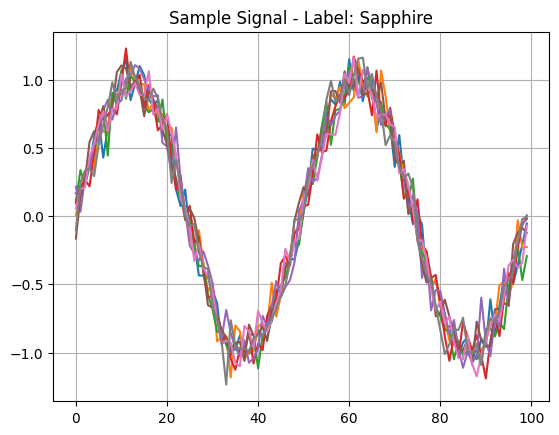

In [10]:
#Visualisation
from matplotlib import pyplot as plt

X_sample, y_sample = data['train']['id_0']
plt.plot(X_sample)
plt.title(f"Sample Signal - Label: {'Ruby' if y_sample == 1 else 'Sapphire'}")
plt.grid()
plt.show()


In [11]:
# === 1. Import des bibliothèques ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Pour garantir la reproductibilité
np.random.seed(2024)

In [12]:
# === 2. Chargement du dataset ===
data = pd.read_pickle('FE_hometask_data_v3.pickle')

print("Contenu du fichier :")
for key in data.keys():
    print(f"- {key}")

Contenu du fichier :
- train
- val


In [13]:
# === 3. Préparation des données ===
X_train = np.array([v[0] for v in data['train'].values()])  # Shape: (N, 100, 8)
y_train = np.array([v[1] for v in data['train'].values()])  # Shape: (N,)

X_val = np.array([v[0] for v in data['val'].values()])
y_val = np.array([v[1] for v in data['val'].values()])

X_test = X_val  # Si pas de données de test séparées

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")

X_train: (200, 100, 8), y_train: (200,)
X_val: (50, 100, 8), y_val: (50,)


In [14]:
# === 4. Fonction de visualisation ===
def vis(signal, color='r'):
    widget_type = 'Ruby' if color == 'r' else 'Sapphire'
    plt.figure(figsize=(10, 6))
    for i in range(signal.shape[1]):  # channels
        plt.plot(signal[:, i], color=color, alpha=0.2 + 0.1*i)
    plt.title(f"Pulse of the Machine - {widget_type}")
    plt.grid(True)
    plt.show()

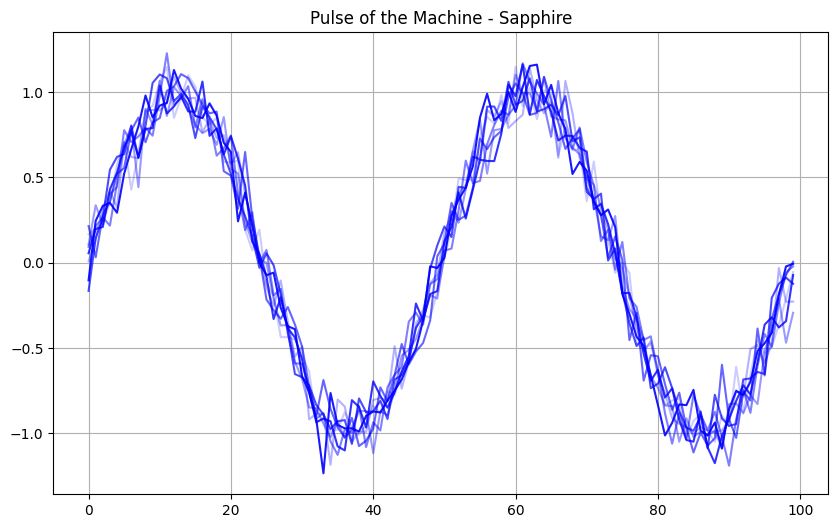

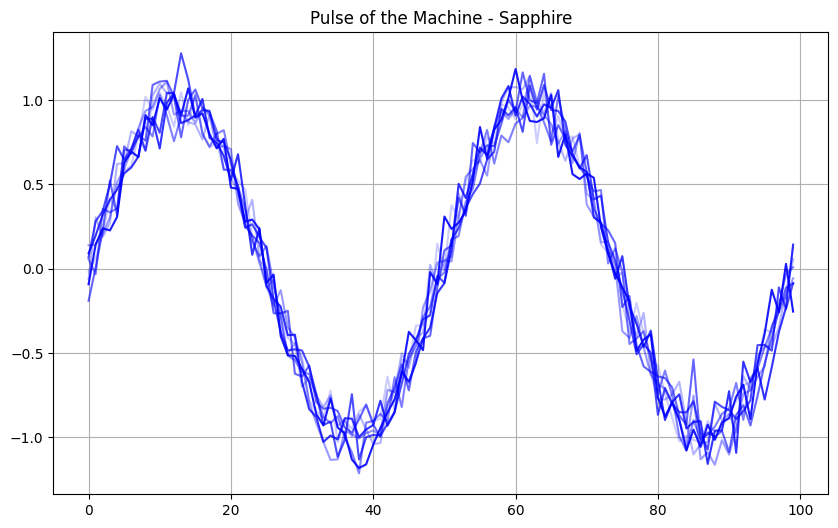

In [15]:
# Exemple de visualisation
vis(X_train[0], 'r' if y_train[0] == 1 else 'b')
vis(X_train[1], 'r' if y_train[1] == 1 else 'b')


In [16]:
# === 5. Fonctions de transformation de features ===
def feature_set_10th(X):
    return np.reshape(X, (X.shape[0], -1))[:, ::10]

def feature_set_mean(X, axis=1):
    return np.mean(X, axis=axis)

def feature_set_std(X, axis=1):
    return np.std(X, axis=axis)


In [17]:
# === 6. Entraînement et évaluation ===
def evaluate_model(train_X, val_X, model_depth=20):
    model = DecisionTreeClassifier(max_depth=model_depth, random_state=2024)
    model.fit(train_X, y_train)
    preds = model.predict(val_X)
    score = roc_auc_score(y_val, preds)
    print(f"AUC (depth={model_depth}): {score:.4f}")
    return model, score


In [18]:
# === 7. Prédiction sur les données de test ===
def write_test_predictions(model, test_X, filename):
    preds = ['1' if x else '0' for x in model.predict(test_X)]
    with open(filename, 'w') as f:
        f.write(''.join(preds))
    print(f"Fichier de prédiction généré : {filename}")

In [19]:
# === 8. Lancement des expérimentations ===

# A. Feature: Mean
X_train_mean = feature_set_mean(X_train, axis=1)
X_val_mean = feature_set_mean(X_val, axis=1)
X_test_mean = feature_set_mean(X_test, axis=1)

In [20]:
# B. Feature: Std
X_train_std = feature_set_std(X_train, axis=1)
X_val_std = feature_set_std(X_val, axis=1)
X_test_std = feature_set_std(X_test, axis=1)

In [21]:
# C. Feature: Sampled
X_train_10th = feature_set_10th(X_train)
X_val_10th = feature_set_10th(X_val)
X_test_10th = feature_set_10th(X_test)

In [22]:
# Modèle 1 : Arbre complet (profond)
print("\n--- Modèle complet (depth=20) avec 10th ---")
model1, _ = evaluate_model(X_train_10th, X_val_10th, model_depth=20)


--- Modèle complet (depth=20) avec 10th ---
AUC (depth=20): 1.0000


In [23]:
# Modèle 2 : Arbre simplifié (depth=4) avec moyenne
print("\n--- Modèle simple (depth=4) avec mean ---")
model2, _ = evaluate_model(X_train_mean, X_val_mean, model_depth=4)


--- Modèle simple (depth=4) avec mean ---
AUC (depth=4): 0.8276


In [24]:
# Modèle 3 : Arbre complet avec STD
print("\n--- Modèle complet (depth=20) avec std ---")
model3, _ = evaluate_model(X_train_std, X_val_std, model_depth=20)


--- Modèle complet (depth=20) avec std ---
AUC (depth=20): 1.0000


In [25]:
# === 9. Génération des fichiers de prédiction ===
write_test_predictions(model1, X_test_10th, 'efficient_test_predictions.txt')
write_test_predictions(model2, X_test_mean, 'super_duper_efficient_test_predictions.txt')

Fichier de prédiction généré : efficient_test_predictions.txt
Fichier de prédiction généré : super_duper_efficient_test_predictions.txt


In [26]:
#Comparaison des différentes features & modèles
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Tableau de comparaison
results = []

print("\n===== 📊 Évaluation comparative =====")

def compare_model(name, model, val_X, val_y=y_val):
    preds = model.predict(val_X)
    proba = model.predict_proba(val_X)[:,1] if hasattr(model, 'predict_proba') else preds
    auc_score = roc_auc_score(val_y, proba)

    results.append((name, auc_score))
    print(f"{name:<40} | AUC: {auc_score:.4f}")

    # Matrice de confusion
    cm = confusion_matrix(val_y, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix: {name}")
    plt.grid(False)
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(val_y, proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"ROC Curve: {name}")
    plt.legend()
    plt.grid(True)
    plt.show()



===== 📊 Évaluation comparative =====


Decision Tree (depth=20) - 10th Sample   | AUC: 1.0000


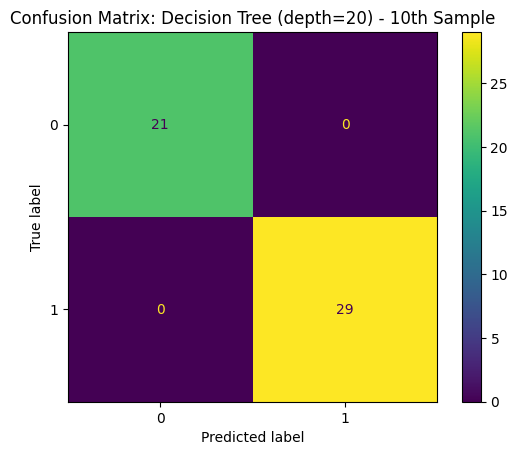

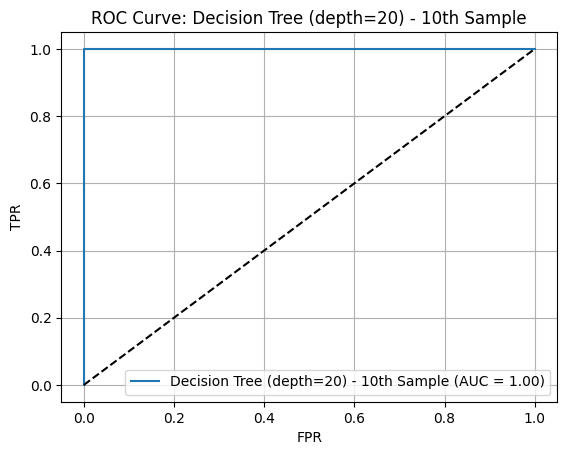

Decision Tree (depth=4) - Mean           | AUC: 0.8276


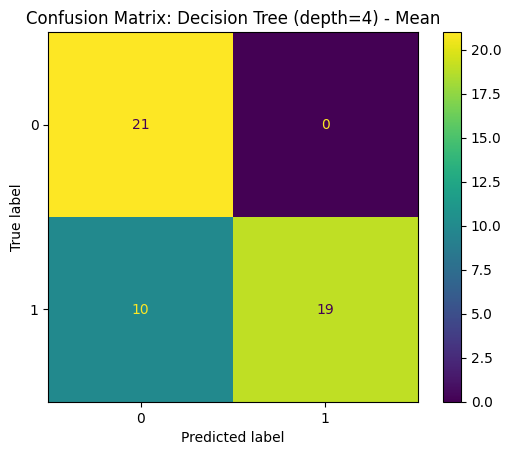

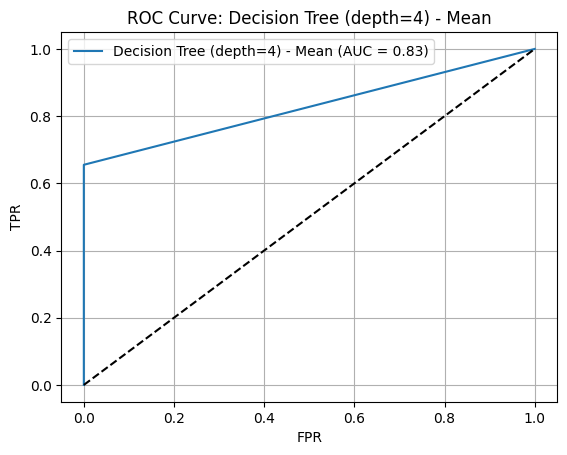

Decision Tree (depth=20) - Std           | AUC: 1.0000


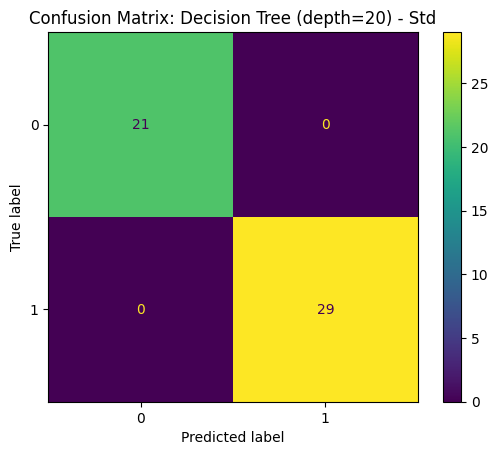

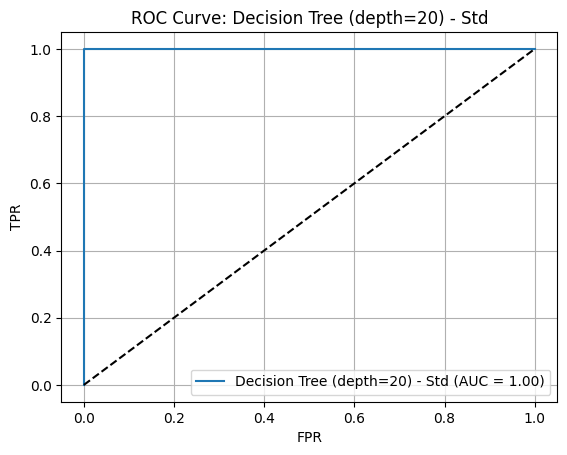

In [27]:
# Évaluation détaillée
compare_model("Decision Tree (depth=20) - 10th Sample", model1, X_val_10th)
compare_model("Decision Tree (depth=4) - Mean", model2, X_val_mean)
compare_model("Decision Tree (depth=20) - Std", model3, X_val_std)


In [28]:
# Résumé comparatif
print("\n📌 Résumé des performances :")
for name, score in sorted(results, key=lambda x: x[1], reverse=True):
    print(f"- {name:<40}: AUC = {score:.4f}")


📌 Résumé des performances :
- Decision Tree (depth=20) - 10th Sample  : AUC = 1.0000
- Decision Tree (depth=20) - Std          : AUC = 1.0000
- Decision Tree (depth=4) - Mean          : AUC = 0.8276
